In [ ]:
#%pip install mlxtend --upgrade

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv
import time

In [ ]:
with open('chess.csv') as f:
    reader = csv.reader(f)
    my_list = list(reader)
#print("csv to list:",my_list)

In [ ]:
te = TransactionEncoder()
array = te.fit(my_list).transform(my_list)
df = pd.DataFrame(array, columns=te.columns_)

In [ ]:
aptime = []
th = []
i = 0.6
while i<1:
  start_time = time.time()
  apfrequent = apriori(df, min_support=i)
  end = time.time() - start_time
  aptime.append(end)
  th.append(i)
  i = i + 0.05

In [ ]:
print("Time",aptime)
print("Threshold",th)

Time [25.090197563171387, 10.014577865600586, 4.208191633224487, 1.2431557178497314, 0.5145609378814697, 0.16198372840881348, 0.03707718849182129, 0.009007453918457031]
Threshold [0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003]


In [ ]:
fptime = []
th = []
i = 0.6
while i<1:
  start_time = time.time()
  frequent = fpgrowth(df, min_support=i)
  end = time.time() - start_time
  fptime.append(end)
  th.append(i)
  i = i + 0.05

In [ ]:
print("Time",fptime)
print("Threshold",th)

Time [4.4493513107299805, 2.200500965118408, 0.8602561950683594, 0.5521917343139648, 0.21033024787902832, 0.10964655876159668, 0.07093000411987305, 0.05050301551818848]
Threshold [0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003]


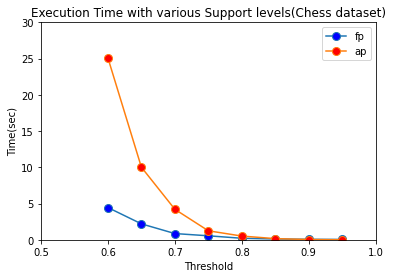

In [ ]:
import matplotlib.pyplot as plt

plt.plot(th, fptime,marker='o', markerfacecolor='blue', markersize=8,  label = "fp")
plt.plot(th, aptime,marker='o', markerfacecolor='red', markersize=8,  label = "ap")
plt.ylim(0,30)
plt.xlim(0.5,1)
plt.xlabel('Threshold')
plt.ylabel('Time(sec)')
plt.legend()
plt.title('Execution Time with various Support levels(Chess dataset)')

plt.show()